In [1]:
import os
import glob
os.listdir()


['.ipynb_checkpoints',
 'CNN classificaiton.ipynb',
 'Images',
 'pokemon COLORED KNN.ipynb',
 'POKEMON KNN GRAY.ipynb',
 'Sample_submission.csv',
 'test dataset',
 'test.csv',
 'train.csv']

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [3]:
dict={"Pikachu":0,
    "Bulbasaur":1,
     "Charmander":2}

In [4]:
data=pd.read_csv("train.csv")


In [5]:
temp=[]
for val in data["NameOfPokemon"]:
    temp.append(dict[val])
encodings=pd.DataFrame({"encoded":temp})
data=data.join(encodings)

In [6]:
path=glob.glob("./Images/*.jpg")

In [7]:
img_data=[]
for i in path:
    img=cv2.imread(i)
    temp=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    temp=cv2.resize(temp,(255,255))
    img_data.append(temp)

In [8]:
img_data=np.array(img_data)
img_data.shape

(304, 255, 255, 3)

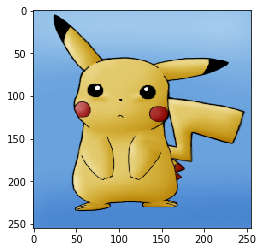

In [9]:
plt.imshow(img_data[0],cmap="gray")

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras import *

Using TensorFlow backend.
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

In [11]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(255,255,3)))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(72,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))


model.add(Flatten())
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.3))         
model.add(Dense(3,activation="softmax"))
model.summary()

W0909 13:07:32.162670 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0909 13:07:32.445079 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 13:07:32.450060 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0909 13:07:32.469967 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 72)        41544     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       83072     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________

# Model Ready to move

In [12]:
import keras.utils 

In [13]:
y=keras.utils.to_categorical(data.iloc[:,2])

In [14]:
from keras.optimizers import Adam
adam=Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',optimizer= adam, metrics=['accuracy'])

W0909 13:08:06.548875 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 13:08:06.556854 17008 deprecation_wrapper.py:119] From c:\users\vaibhav jain\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(img_data,y,test_size=0.25)

In [25]:
#aftere 30 epochs loss is 1.1886 anda acc=0.3596
#around 70-80 epochx,  loss is 0.5848, acc=0.7632
#after around 100 epochs , loss is 0.5092 ,acc = 0.7719
hist=model.fit(xtr,ytr,epochs=5,batch_size=60,validation_data=(xt,yt),shuffle=True)


Train on 228 samples, validate on 76 samples
Epoch 1/5
228/228 [==============================] - 12s 53ms/step - loss: 0.4257 - acc: 0.8158 - val_loss: 0.2801 - val_acc: 0.8816
Epoch 2/5
228/228 [==============================] - 14s 63ms/step - loss: 0.4478 - acc: 0.7763 - val_loss: 0.2445 - val_acc: 0.8816
Epoch 3/5
228/228 [==============================] - 15s 64ms/step - loss: 0.4009 - acc: 0.8070 - val_loss: 0.2398 - val_acc: 0.8947
Epoch 4/5
228/228 [==============================] - 15s 64ms/step - loss: 0.4678 - acc: 0.7939 - val_loss: 0.2492 - val_acc: 0.9079
Epoch 5/5
228/228 [==============================] - 14s 63ms/step - loss: 0.3708 - acc: 0.8377 - val_loss: 0.2801 - val_acc: 0.8684


# Prediction 

In [132]:
predict_data=pd.read_csv("test.csv")
predict_data.shape

(123, 1)

In [133]:
new_path="./test dataset/Images/"
temp_data=[]
#path=glob.glob("./test dataset/Images/")
for element in predict_data["ImageId"]:
    data=cv2.imread(new_path+str(element))
    data=cv2.cvtColor(data,cv2.COLOR_BGR2RGB)
    data=cv2.resize(data,(255,255))
    temp_data.append(data)
    
    
    

In [134]:
new_data=np.array(temp_data)
new_data.shape

(123, 255, 255, 3)

In [135]:
new_dict={0:"Pikachu",
    1:"Bulbasaur",
     2:"Charmander"}

In [136]:
prediction=[]
prediction=model.predict(new_data)
prediction=np.array(prediction)

In [137]:
prediction.shape
#just=prediction.reshape(123,3)

(123, 3)

In [138]:
output_pred=np.array([])
pika=[]
output_pred=np.argmax(prediction,axis=1)
for i in output_pred:
    pika.append(new_dict[i])
    
pika=pd.DataFrame(pika)

In [139]:
predict_data=pd.concat([predict_data,pika],axis=1)

In [141]:
predict_data

,ImageId,0
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
5,2030.jpg,Pikachu
6,2035.jpg,Pikachu
7,1110.jpg,Bulbasaur
8,1104.jpg,Bulbasaur
9,2217.jpg,Charmander
